# Import Required Libraries
Import necessary libraries such as OSMnx, Networkx, GeoPandas, and Matplotlib.

In [ ]:

import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt


# Specify the Place Name
Define the location for which the data will be fetched using a place name string.

In [3]:
# Specify the name that is used to seach for the data 
place_name = "Khulna University of Engineering and Technology - KUET, Teligati Road, Pakarmatha, Fulbarigate, Dighalia, Khulna District, Khulna Division, 9203, Bangladesh"

# Fetch and Project the Street Network
Use OSMnx to fetch the street network for the specified location and project it to UTM for accurate plotting.

In [4]:
# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name, simplify=True, network_type= 'all')

In [5]:
# Check data type of the graph
type(graph)

#DiGraph is a data type that stores nodes and edges with optional data, or attributes.

networkx.classes.multidigraph.MultiDiGraph

In [6]:
#Project graph from its current CRS to UTM.
graph = ox.project_graph(graph)

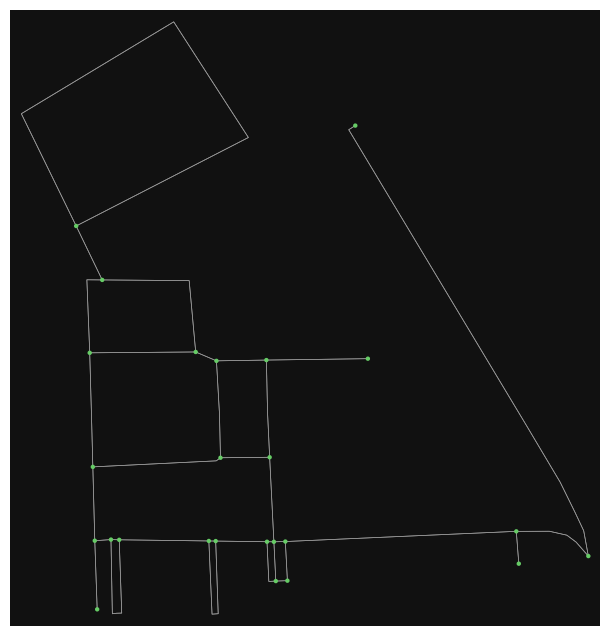

In [7]:
#Plot the graph nodes and edges
fig, ax = ox.plot_graph(graph, edge_linewidth=0.5, node_size=10, node_color="#66cc66")

# Downloading OSM Geospatial Entities with OSMnx

In [8]:
# returns a GeoDataFrame based on the specified place name query
area = ox.geocode_to_gdf(place_name)

In [9]:
# Check the data values
area.head()

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((89.49583 22.90023, 89.49708 22.90017...",89.495828,22.897481,89.506719,22.904574,231320281,way,376069528,22.900913,89.502471,amenity,university,30,0.000054,amenity,Khulna University of Engineering and Technolog...,Khulna University of Engineering and Technolog...


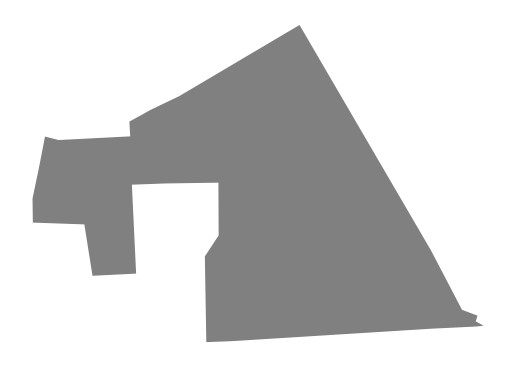

In [ ]:
# get the polygon for KUET, project it to UTM, and plot it
area_proj = ox.projection.project_gdf(area)
ax = area_proj.plot(fc="grey", ec="none")
_ = ax.axis("off")

# Retrieve Geometries
Use OSMnx's `features_from_place` function to retrieve desired geometries for the specified location.

In [11]:
# Select buildings
buildings = ox.features_from_place(place_name, tags={'building': True})

# Select waterbodies
waterbodies = ox.features_from_place(place_name, tags={'natural': 'water'})

# Select parks and fields
parks_fields = ox.features_from_place(place_name, tags={'leisure': ['park', 'pitch','playground']})

In [12]:
# Check how many building footprints we received
len(buildings) 


102

In [13]:
# Check how many waterbodies we received
len(waterbodies)

7

In [14]:
# Check how many parks and fields we received
len(parks_fields)

5

In [15]:
waterbodies.head()

geometry natural  \
element id                                                                     
way     189988115  POLYGON ((89.50213 22.90001, 89.50214 22.89967...   water   
        332676144  POLYGON ((89.50368 22.89875, 89.50453 22.89875...   water   
        352039060  POLYGON ((89.50342 22.90256, 89.5026 22.9021, ...   water   
        369483719  POLYGON ((89.50058 22.90076, 89.50069 22.90076...   water   
        369569901  POLYGON ((89.50092 22.90064, 89.50092 22.90065...   water   

                          water  ele                   name survey:date  
element id                                                               
way     189988115   Poddo_Pukur  NaN                    NaN         NaN  
        332676144          pond   2m             KUET Dighi         NaN  
        352039060          pond  NaN                    NaN         NaN  
        369483719  intermittent  NaN  Water Treatment Plant  2025-01-22  
        369569901           NaN  NaN              Reservoir         NaN

In [16]:
parks_fields.head()

geometry  \
element id                                                              
way     189988131   POLYGON ((89.50347 22.899, 89.50514 22.89902, ...   
        231353031   POLYGON ((89.50213 22.90046, 89.50252 22.90046...   
        369568181   POLYGON ((89.50201 22.90105, 89.50212 22.90106...   
        1056152427  POLYGON ((89.50025 22.9028, 89.50115 22.90321,...   
        1056152431  POLYGON ((89.50137 22.89876, 89.50174 22.89876...   

                       leisure                  name  
element id                                            
way     189988131   playground  KUET Main Playground  
        231353031         park                  Park  
        369568181   playground          Tennis Court  
        1056152427  playground        KUET Res. Math  
        1056152431  playground                   NaN

In [17]:
buildings.head()

geometry addr:city  \
element  id                                                                     
relation 7890104  POLYGON ((89.50395 22.90096, 89.50395 22.90088...    Khulna   
         7890105  POLYGON ((89.50242 22.90058, 89.50216 22.90058...    Khulna   
         7890106  POLYGON ((89.50323 22.90049, 89.50323 22.90018...    Khulna   
         7890107  POLYGON ((89.50332 22.89996, 89.50333 22.89966...    Khulna   
         7890108  POLYGON ((89.50055 22.89797, 89.50063 22.89797...    Khulna   

                     building building:levels                    name  \
element  id                                                             
relation 7890104          yes             NaN                     NaN   
         7890105       office             NaN  Adminstration Building   
         7890106       school             NaN                      CE   
         7890107       school             NaN                     EEE   
         7890108  residential             NaN       Amar Ekushey Hall   

                 survey:date nohousenumber amenity opening_hours roof:levels  \
element  id                                                                    
relation 7890104         NaN           NaN     NaN           NaN         NaN   
         7890105         NaN           NaN     NaN           NaN         NaN   
         7890106         NaN           NaN     NaN           NaN         NaN   
         7890107         NaN           NaN     NaN           NaN         NaN   
         7890108         NaN           NaN     NaN           NaN         NaN   

                          type addr:postcode  
element  id                                   
relation 7890104  multipolygon           NaN  
         7890105  multipolygon           NaN  
         7890106  multipolygon          9203  
         7890107  multipolygon           NaN  
         7890108  multipolygon           NaN

In [18]:
buildings.columns

Index(['geometry', 'addr:city', 'building', 'building:levels', 'name',
       'survey:date', 'nohousenumber', 'amenity', 'opening_hours',
       'roof:levels', 'type', 'addr:postcode'],
      dtype='object')

In [19]:
# project to UTM
buildings_proj= ox.projection.project_gdf(buildings)

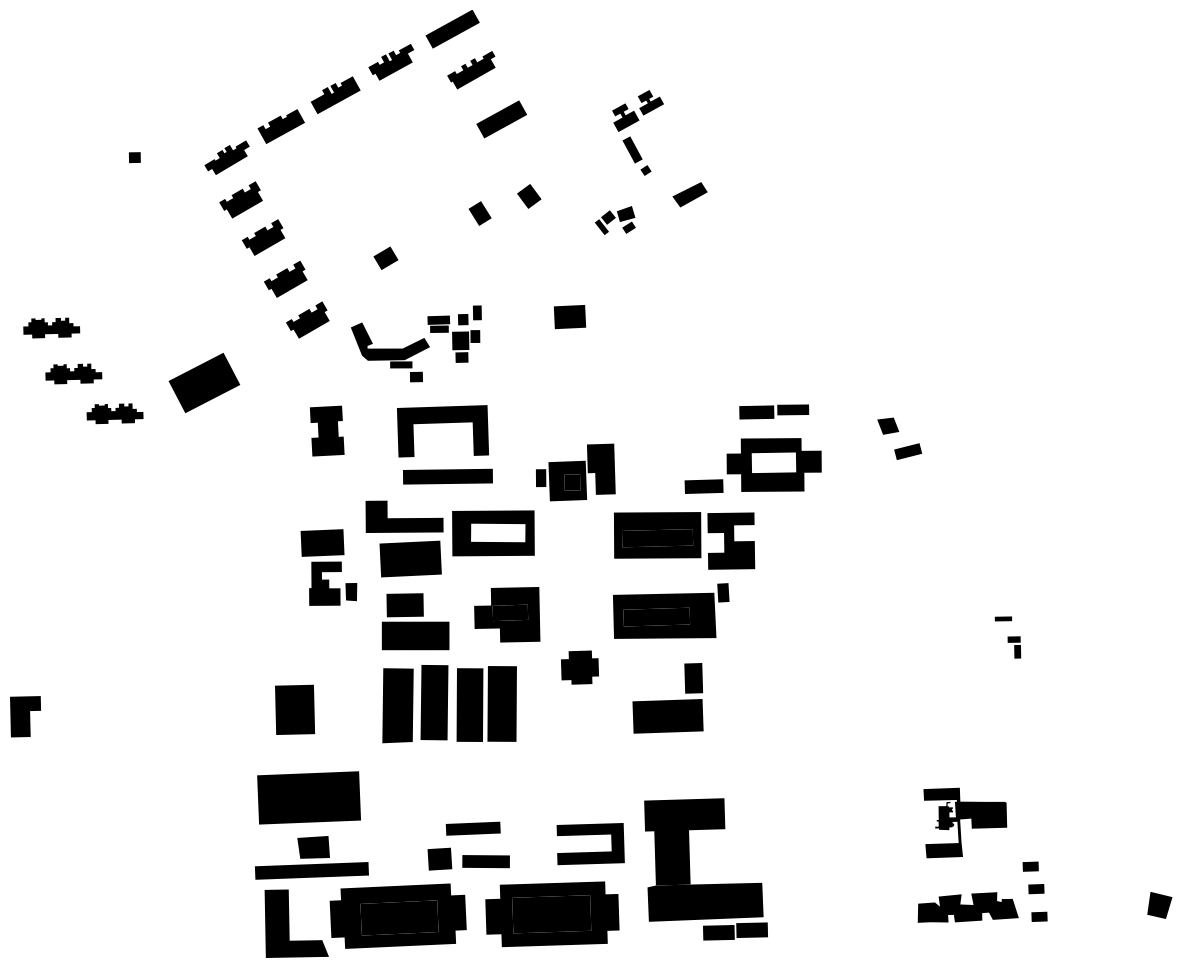

In [20]:
# Plot 
fig, ax = ox.plot_footprints(buildings_proj, figsize=(15, 15), color='black', bgcolor='w')
_ = ax.axis("off")

# Retrieve Nodes and Edges from the Graph

The `ox.graph_to_gdfs()` function from the OSMnx library is used to convert a graph object into two GeoDataFrames: one for the nodes and another for the edges. 

- **Nodes**: Represent the points or intersections in the graph (e.g., road intersections).
- **Edges**: Represent the connections or paths between the nodes (e.g., roads, pathways).

In this case, the `graph` variable, which contains the street network of the specified location, is converted into `nodes` and `edges` GeoDataFrames. These GeoDataFrames allow for easier analysis and visualization of the network data.

The resulting variables:
- `nodes`: Contains information about the locations of intersections and other points of interest in the network.
- `edges`: Contains information about the connections between the nodes, including attributes such as length, geometry, and type of connection.


In [21]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

In [22]:
nodes.head()

,y,x,street_count,geometry
osmid,,,,
701591608,2.534506e+06,756552.792017,3,POINT (756552.792 2534505.7)
2005944127,2.534505e+06,756536.109776,3,POINT (756536.11 2534504.531)
1472230562,2.534505e+06,756561.305952,3,POINT (756561.306 2534505.48)
11531621292,2.534504e+06,756653.634650,3,POINT (756653.635 2534504.279)
2005944125,2.534692e+06,756817.461021,1,POINT (756817.461 2534692.076)


In [23]:
edges.head()

osmid  highway  oneway  reversed      length  \
u          v           key                                                     
701591608  2005944127  0     55873374  service   False      True   16.689433   
           1472230562  0    232044294  service   False     False    8.499549   
                       1    232044295  service   False     False  162.202023   
2005944127 701591608   0     55873374  service   False     False   16.689433   
           11531621287 0     55873374  service   False      True   76.383173   

                                                                     geometry  \
u          v           key                                                      
701591608  2005944127  0    LINESTRING (756552.792 2534505.7, 756536.11 25...   
           1472230562  0    LINESTRING (756552.792 2534505.7, 756561.306 2...   
                       1    LINESTRING (756552.792 2534505.7, 756554.204 2...   
2005944127 701591608   0    LINESTRING (756536.11 2534504.531, 756552.792 ...   
           11531621287 0    LINESTRING (756536.11 2534504.531, 756534.109 ...   

                           name  
u          v           key       
701591608  2005944127  0    NaN  
           1472230562  0    NaN  
                       1    NaN  
2005944127 701591608   0    NaN  
           11531621287 0    NaN

# Plotting the layers
Create a subplot and visualize different geospatial layers (area, road network, buildings, waterbodies, and parks/fields) on separate axes. 

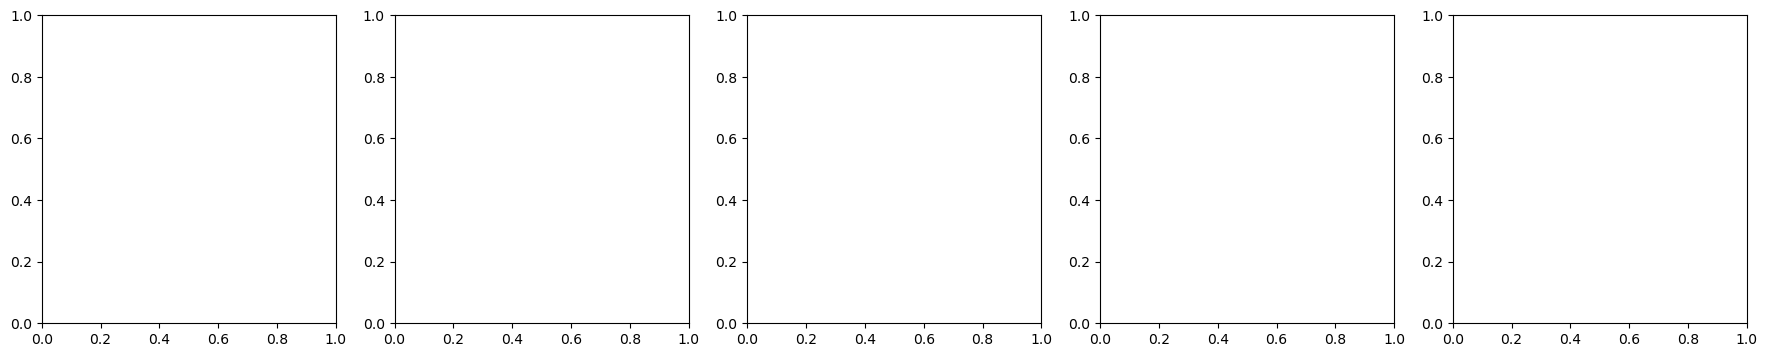

In [24]:
fig, ax = plt.subplots(1, 5, figsize=(22,4))

In [25]:
ax0, ax1, ax2, ax3, ax4 = ax

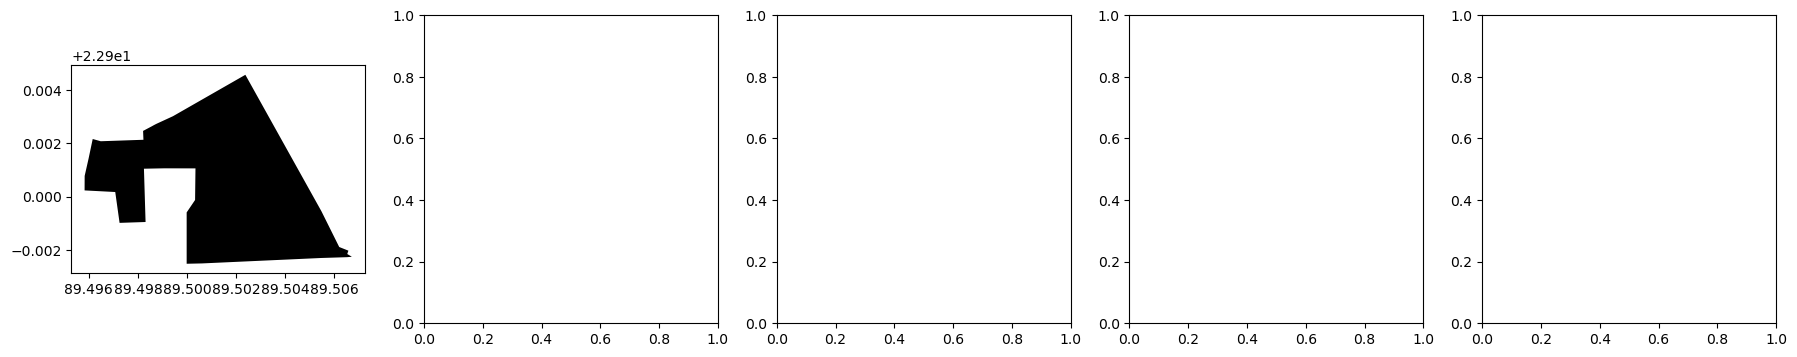

In [26]:
# Plot the area
area.plot(ax=ax0, facecolor='black')
fig

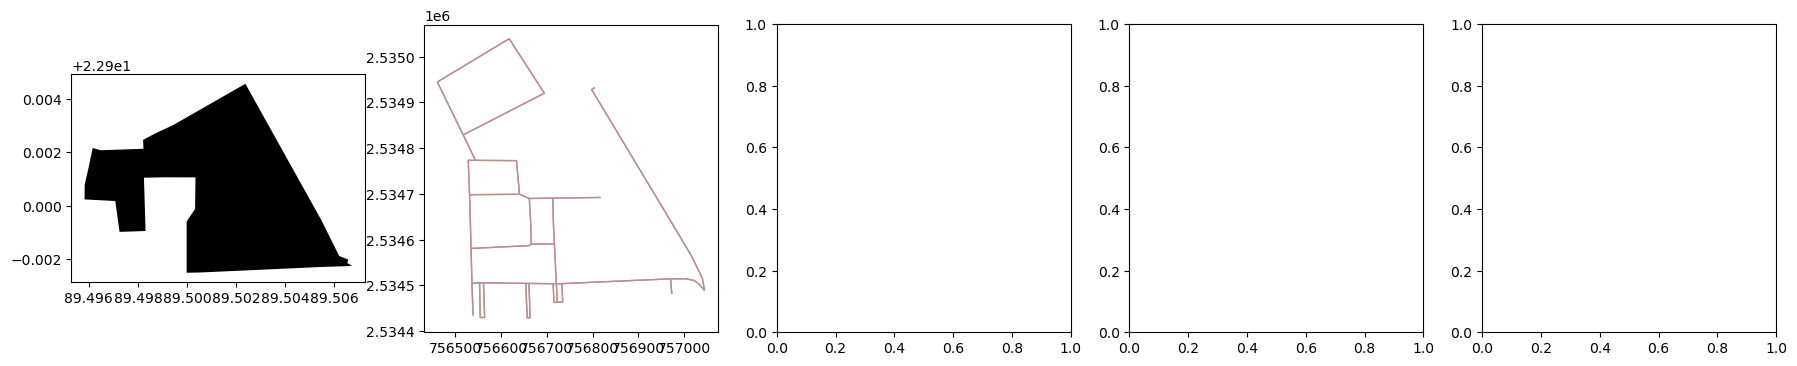

In [27]:
# Plot the network edges
edges.plot(ax=ax1 ,linewidth=1, edgecolor='#BC8F8F')
fig

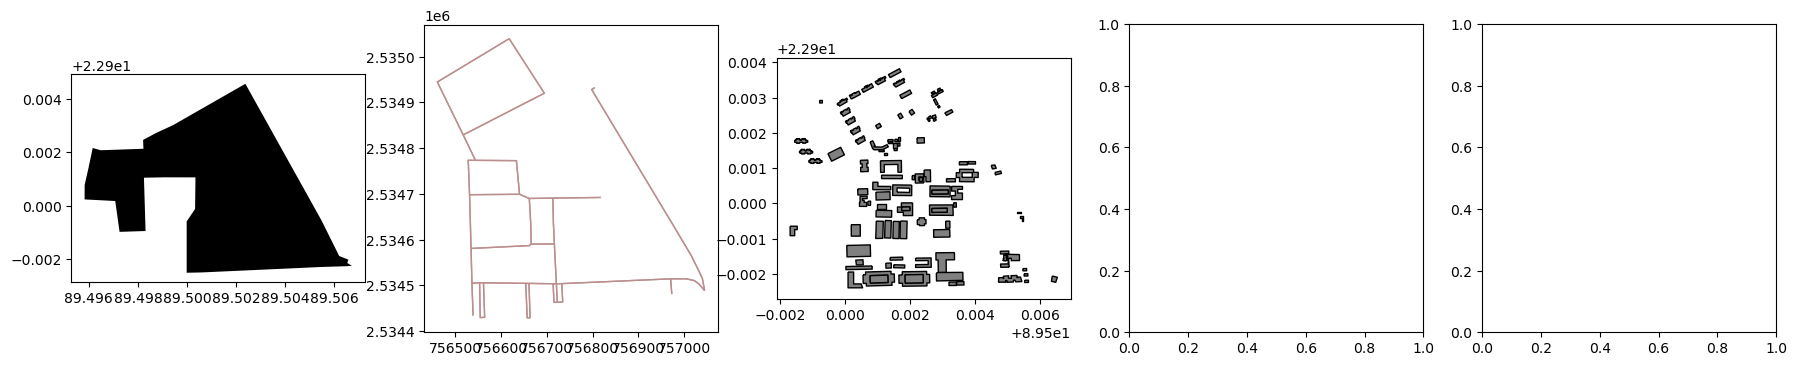

In [28]:
#plot the buildings
buildings.plot(ax=ax2, facecolor='grey', edgecolor='black')
fig

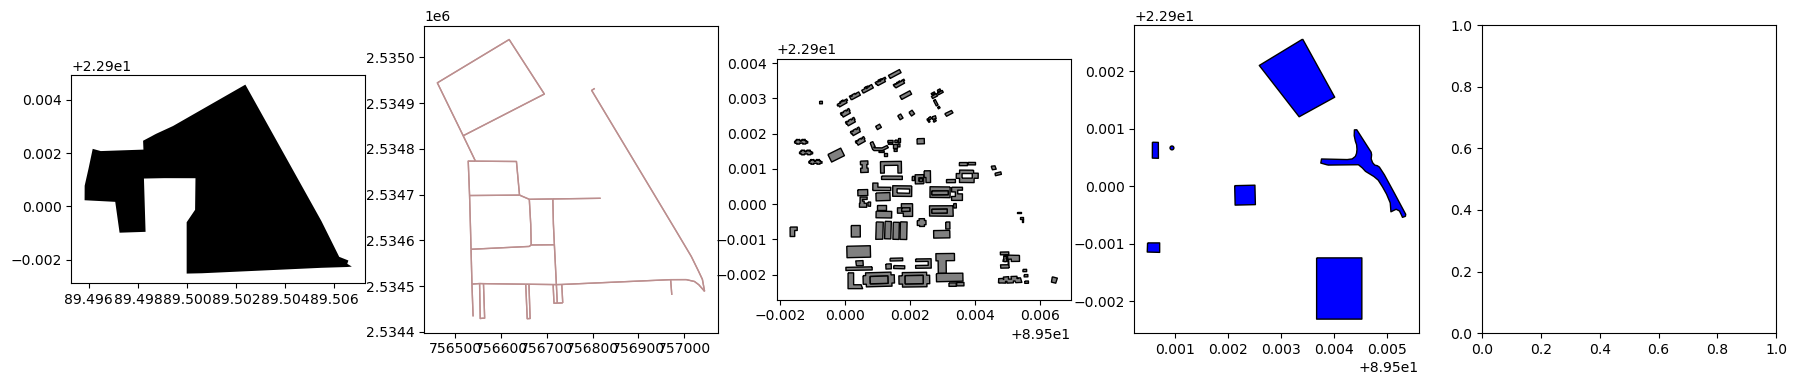

In [29]:
#plot the waterbodies
waterbodies.plot(ax=ax3, facecolor='blue', edgecolor='black')
fig

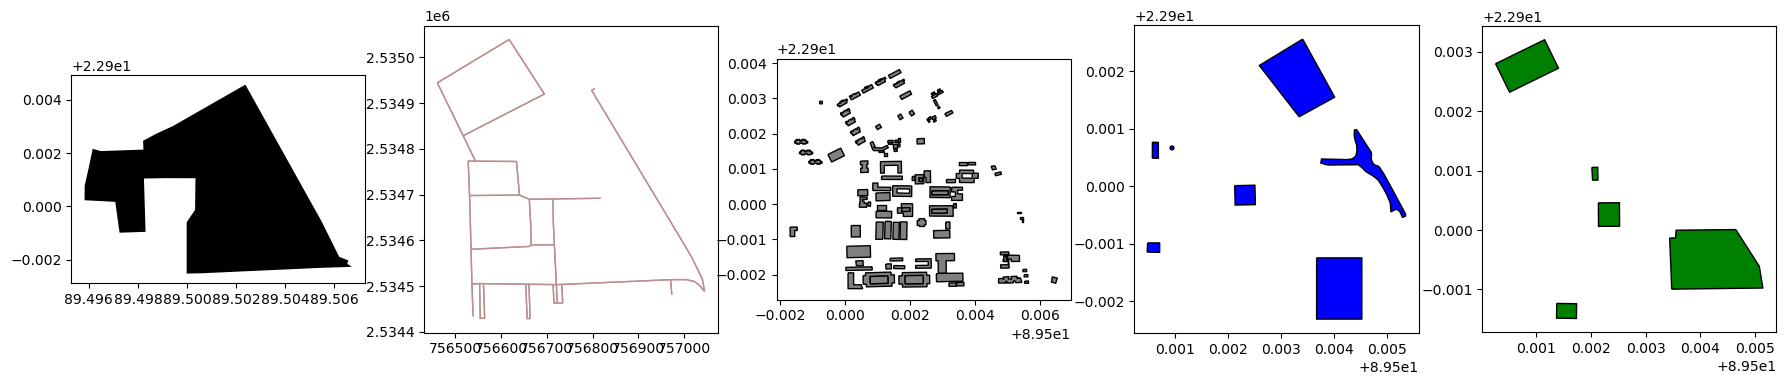

In [30]:
#plot the parks and fields
parks_fields.plot(ax=ax4, facecolor='green', edgecolor='black')
fig

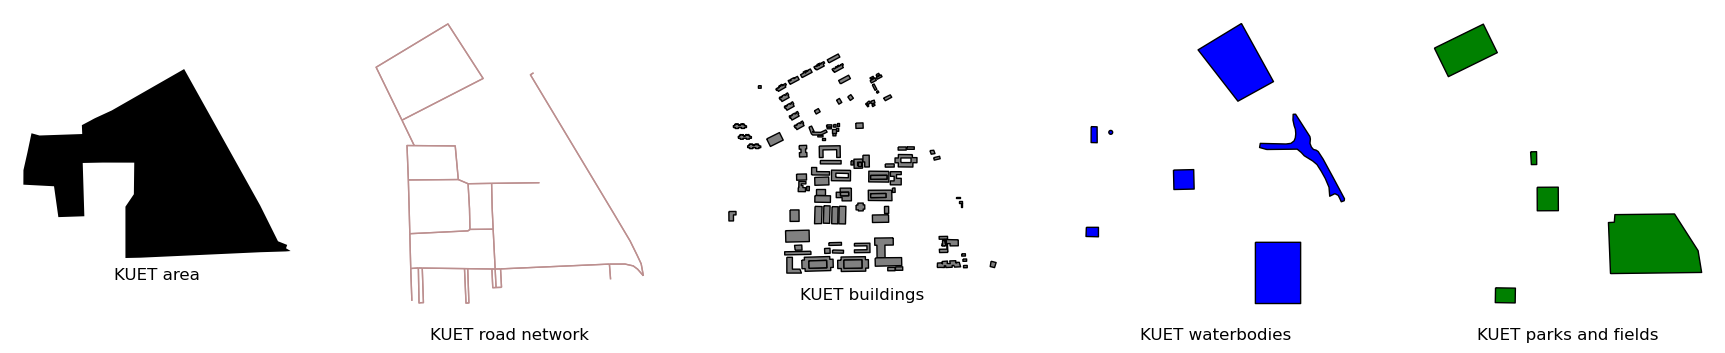

In [31]:
# Remove axis and add titles
ax0.axis('off')
ax0.set_title('KUET area', y=-0.1)
ax1.axis('off')
ax1.set_title('KUET road network', y=-0.1)
ax2.axis('off')
ax2.set_title('KUET buildings', y=-0.1)
ax3.axis('off')
ax3.set_title('KUET waterbodies', y=-0.1)
ax4.axis('off')
ax4.set_title('KUET parks and fields', y=-0.1)

fig

# Re-project layers to EPSG:32646

In [32]:
from pyproj import CRS

# Set projection
projection = CRS.from_epsg(32646)  # UTM zone 46N

# Re-project layers
area = area.to_crs(projection)
edges = edges.to_crs(projection)
buildings = buildings.to_crs(projection)
waterbodies = waterbodies.to_crs(projection)
parks_fields = parks_fields.to_crs(projection)


# Plotting data

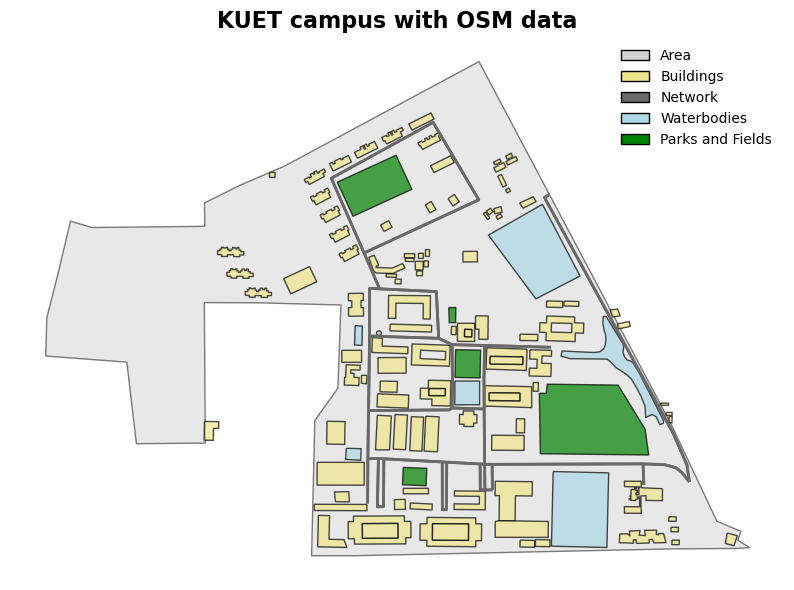

In [35]:
from matplotlib.patches import Patch
# Create a new plot with the re-projected layers overlapped:
fig, ax = plt.subplots(figsize=(22,6))

ax.axis('off')

# Plot the area
area.plot(ax=ax, facecolor='lightgrey', edgecolor='black', alpha=0.5)
# plot the buildings
buildings.plot(ax=ax, facecolor='khaki', edgecolor='black', alpha=0.7)
# plot the network
edges.plot(ax=ax, linewidth=2, edgecolor='dimgray')
# plot the waterbodies
waterbodies.plot(ax=ax, facecolor='lightblue', edgecolor='black', alpha=0.7)
# plot the parks and fields
parks_fields.plot(ax=ax, facecolor='green', edgecolor='black', alpha=0.7)

#add labels
ax.set_title('KUET campus with OSM data', fontsize=16, fontweight='bold')
ax.set_xlabel('Longitude', fontsize=12, fontweight='bold')
ax.set_ylabel('Latitude', fontsize=12, fontweight='bold')

# Add a legend
legend_elements = [
    Patch(facecolor='lightgrey', edgecolor='black', label='Area'),
    Patch(facecolor='khaki', edgecolor='black', label='Buildings'),
    Patch(facecolor='dimgray', edgecolor='black', label='Network'),
    Patch(facecolor='lightblue', edgecolor='black', label='Waterbodies'),
    Patch(facecolor='green', edgecolor='black', label='Parks and Fields')
]

ax.legend(handles=legend_elements, loc='upper right', fontsize=10, frameon=False)

plt.tight_layout()

In [36]:
#Save the area, buildings, network, waterbodies, and parks and fields as geopackage to work with them in GIS
area.to_file("kuet_area.gpkg", layer='area', driver="GPKG")
edges.to_file("kuet_area.gpkg", layer='network', driver="GPKG") 
buildings.to_file("kuet_area.gpkg", layer='buildings', driver="GPKG")
waterbodies.to_file("kuet_area.gpkg", layer='waterbodies', driver="GPKG")
parks_fields.to_file("kuet_area.gpkg", layer='parks_fields', driver="GPKG")

